# mmdcornea
Cornea cells marking.

## Description
This procedure creates a maker for each cell in a very poor quality microscopic image of a cornea. The composition of an opening with the regional maximum is used to create the markers.

In [3]:
import numpy as np
from PIL import Image
import ia870 as ia

# Reading and topographic view
The gray-scale image of the cornea is read and displayed. A topographic model is also displayed. We can notice that the cells are formed by small hills in the topographic model. We can also notice that the image is very noisy. 

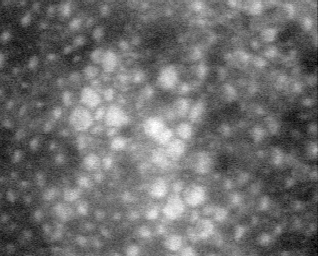

In [21]:
a_pil = Image.open('data/corneacells.tif').convert('L')
# b = mmsurf(a);
a_pil

In [22]:
a = np.array (a_pil)

# Filtering and cell detection
The image is filtered by an alternating sequential filtering with size 2. This filter is composed by openings and closings, removing small peaks and valleys. Next, the regional maxima are detected. For illustrative purpose, they are displayed overlayed on the topographic image view. These regional maxima are the markers for each cell. If anything goes wrong in this step, the error will be propagated throughout the process.

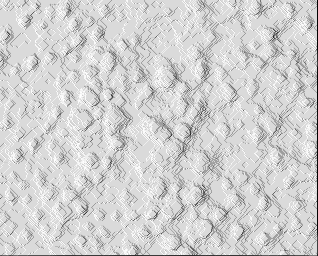

In [31]:
c = ia.iaasf(a,'OC',ia.iasecross(),2)
d = ia.iaregmax(c)
Image.fromarray(ia.iagsurf(c))

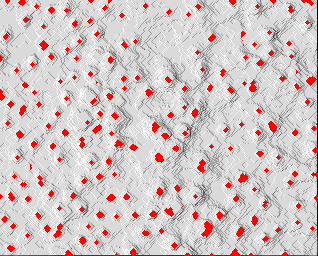

In [34]:
Image.fromarray(ia.iagshow(ia.iagsurf(c), d).transpose(1,2,0))

# Find the background marker
Following the paradigm of segmentation by watershed, the background marker is detected by applying the constrained watershed on the negation of the cells image using the markers detected in the last step. These watershed lines partition the image in regions of influence of each cell. For illustrative display, the negative of the cell image is displayed overlayed by the markers on the left, and also overlayed by the watershed lines on the right. 

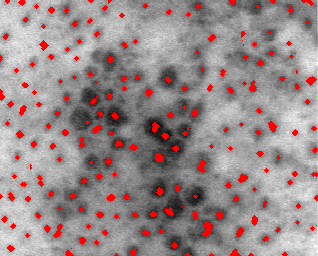

In [35]:
e = ia.ianeg(a);
f = ia.iacwatershed(e, d, ia.iasebox());
Image.fromarray(ia.iagshow(e, d).transpose(1, 2, 0))

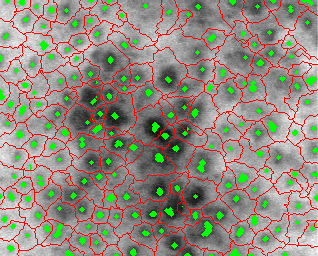

In [36]:
Image.fromarray(ia.iagshow(e, f, d).transpose(1, 2, 0))

# Labeling the markers and gradient
As the internal and external markers can be touching, we combine the external marker with value 1 with the labeling of the internal markers added by 1. The labeled marker image is shown on the left. The final watershed will be applied on the gradient of the original image, which is shown on the right. 

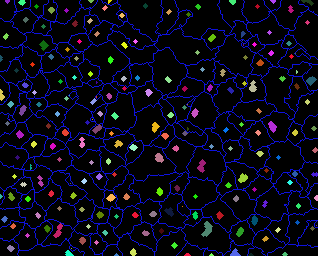

In [37]:
g = ia.iagray(f, 'uint16', 1);
h1 = ia.iaaddm(ia.ialabel(d), np.uint16(1));
h = ia.iaintersec(ia.iagray(d,'uint16'), h1);
i = ia.iaunion( g, h);
Image.fromarray(ia.iaglblshow(i).transpose(1, 2, 0))
#mmshow(j);

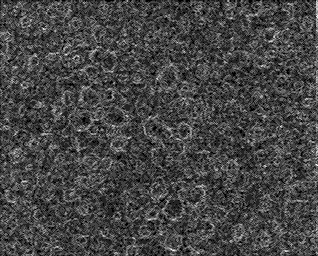

In [38]:
j = ia.iagradm( a)
Image.fromarray((255.*j/j.max()).astype(np.uint8))

## Constrained watershed of the gradient from markers
Apply the constrained watershed on the gradient from the labeled internal and external markers. Show the watershed lines on the left and the results overlayed on the original image, on the right. 

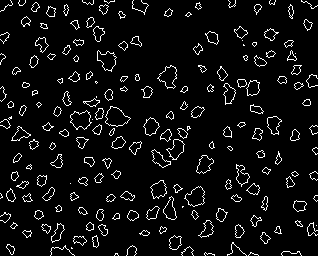

In [39]:
k = ia.iacwatershed(j, i)
Image.fromarray(k.astype(np.uint8)*255)

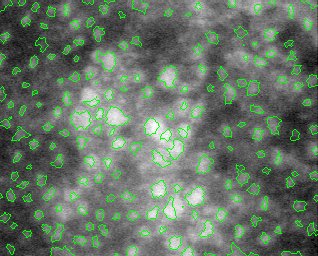

In [40]:
Image.fromarray(ia.iagshow(a, k, k).transpose(1, 2, 0))